# Selection of rules

With increasing number of transcription factors, co-occurrence analysis generally yields thousand of rules, which makes interpretation difficult. In this notebook, we will show how some different methods to select rules of interest from the original analysis. We will use the same data as within the 'chipseq analysis' notebook:

In [1]:
import tfcomb.objects
C = tfcomb.objects.CombObj().from_pickle("../data/GM12878.pkl")

In [2]:
C

<CombObj: 112109 TFBS (151 unique names) | Market basket analysis: 10642 rules>

----------

## Select rules using co-occurrence measures

In this example, we will use the function .select_significant_rules() to select rules based on two measures. Default for this function are the "zscore" and "cosine" measures.

INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds


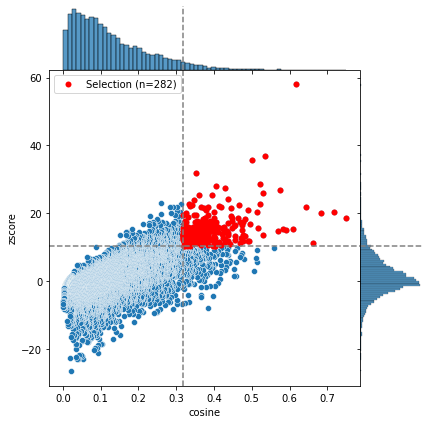

In [3]:
selected = C.select_significant_rules()

The function returns an instance of a CombObj containing only the selected rules and TFBS for the TFs within .rules:

In [4]:
selected

<CombObj: 83705 TFBS (86 unique names) | Market basket analysis: 282 rules>

In [5]:
selected.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
CTCF-RAD21,CTCF,RAD21,1751,2432,2241,0.750038,18.643056
RAD21-SMC3,RAD21,SMC3,1376,2241,1638,0.718192,20.314026
CTCF-SMC3,CTCF,SMC3,1361,2432,1638,0.681898,20.245177
IKZF1-IKZF2,IKZF1,IKZF2,1726,2922,2324,0.662343,11.215960
SMC3-ZNF143,SMC3,ZNF143,1060,1638,1652,0.644383,21.838431
...,...,...,...,...,...,...,...
GABPA-ZBED1,GABPA,ZBED1,211,666,659,0.318495,14.915274
GABPA-MTA3,GABPA,MTA3,216,666,692,0.318173,12.609150
CBFB-STAT5A,CBFB,STAT5A,195,829,454,0.317855,15.633269
GABPA-NFATC1,GABPA,NFATC1,214,666,681,0.317763,13.977084


We will save this object for use in other notebooks:

In [6]:
selected.to_pickle("../data/GM12878_selected.pkl")

The strictness of the selection can be controlled via _x\_threshold\_percent_ and _y\_threshold\_percent_ as seen here:

INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds


<CombObj: 30229 TFBS (29 unique names) | Market basket analysis: 22 rules>

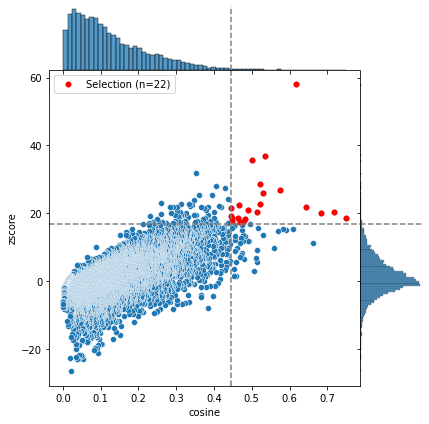

In [7]:
C.select_significant_rules(x_threshold_percent=0.01, y_threshold_percent=0.01)

------------

## Select top rules

We can also use the function `.select_top_rules()` to select the first _n_ rules from .rules: 

In [8]:
selected2 = C.select_top_rules(n=100)

In [9]:
selected2.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
CTCF-RAD21,CTCF,RAD21,1751,2432,2241,0.750038,18.643056
RAD21-SMC3,RAD21,SMC3,1376,2241,1638,0.718192,20.314026
CTCF-SMC3,CTCF,SMC3,1361,2432,1638,0.681898,20.245177
IKZF1-IKZF2,IKZF1,IKZF2,1726,2922,2324,0.662343,11.215960
SMC3-ZNF143,SMC3,ZNF143,1060,1638,1652,0.644383,21.838431
...,...,...,...,...,...,...,...
IKZF1-NFATC3,IKZF1,NFATC3,770,2922,1167,0.416980,6.271326
ATF7-IKZF2,ATF7,IKZF2,908,2061,2324,0.414886,2.376816
DPF2-IKZF1,DPF2,IKZF1,963,1844,2922,0.414864,0.597690
ATF2-EP300,ATF2,EP300,484,1484,922,0.413774,11.601051


--------------

## Select rules based on a list of TF names

If you are only interested in the rules concerning a list of TFs, it is possible to use `.select_TF_rules` to subset the rules to a subset of TF names. Here, we create a subset of rules containing the TFs in TF_list:

In [10]:
TF_list = ["ELK1", "CTCF", "ZNF143", "YY1"]

In [11]:
selected3 = C.select_TF_rules(TF_list)

INFO: Selected 6 rules
INFO: Creating subset of object


In [12]:
selected3

<CombObj: 5686 TFBS (4 unique names) | Market basket analysis: 6 rules>

In [13]:
selected3.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
CTCF-ZNF143,CTCF,ZNF143,1170,2432,1652,0.583713,15.459923
YY1-ZNF143,YY1,ZNF143,555,1365,1652,0.369591,6.797111
CTCF-YY1,CTCF,YY1,481,2432,1365,0.263996,-3.079479
ELK1-YY1,ELK1,YY1,88,237,1365,0.154718,4.946988
ELK1-ZNF143,ELK1,ZNF143,95,237,1652,0.151825,3.295755
CTCF-ELK1,CTCF,ELK1,28,2432,237,0.036881,-6.360275


It is also possible to specify that the rules should only be selected from matches to TF1 (by setting TF2=False):

In [14]:
selected3 = C.select_TF_rules(TF_list, TF2=False)

INFO: Selected 257 rules
INFO: Creating subset of object


In [15]:
selected3.rules

,TF1,TF2,TF1_TF2_count,TF1_count,TF2_count,cosine,zscore
CTCF-RAD21,CTCF,RAD21,1751,2432,2241,0.750038,18.643056
CTCF-SMC3,CTCF,SMC3,1361,2432,1638,0.681898,20.245177
CTCF-ZNF143,CTCF,ZNF143,1170,2432,1652,0.583713,15.459923
CTCF-TRIM22,CTCF,TRIM22,900,2432,1786,0.431837,4.237106
YY1-ZNF143,YY1,ZNF143,555,1365,1652,0.369591,6.797111
...,...,...,...,...,...,...,...
CTCF-SUZ12,CTCF,SUZ12,4,2432,172,0.006185,-6.526432
CTCF-PAX8,CTCF,PAX8,3,2432,165,0.004736,-7.317208
CTCF-NFYA,CTCF,NFYA,1,2432,21,0.004425,-2.072913
CTCF-ZZZ3,CTCF,ZZZ3,1,2432,32,0.003585,-2.896546


In case a TF is not found in rules, `.select_TF_rules` will write a warning and raise an error:

In [16]:
TF_list = ["NOTFOUND"]
selected_warning = C.select_TF_rules(TF_list)

InputError: No rules could be selected - please adjust TF_list and/or TF1/TF2 parameters.